In [ ]:
import tensorflow as tf
import os
import cv2 as cv
import numpy as np
import sys
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import functools
import h5py
!pip install boto3
import boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
input = h5py.File(path_to_training_data, "r")

images = input["images"][:]
labels = input["labels"][:].astype(np.float32)

In [ ]:
if not os.path.isfile('/content/dataset.hdf5'):
  s3 = boto3.client(
    's3',
    aws_access_key_id='',
    aws_secret_access_key=''
  )
  s3.download_file(Bucket='debashd',Key='datasets/dataset.hdf5',Filename='dataset.hdf5')
input = h5py.File('/content/dataset.hdf5', "r")

images = input["images"][:]
labels = input["labels"][:].astype(np.float32)
print(images.shape)
print(labels.shape)

(10660, 64, 64, 3)
(10660, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

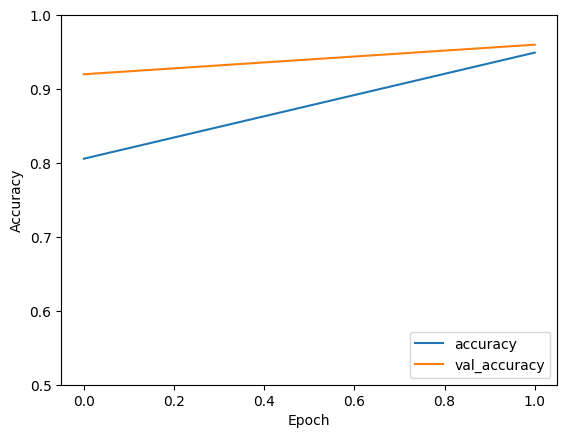

In [ ]:
n_filters = 32

# Model
def make_standard_classifier(n_outputs=1):
  model = models.Sequential()
  model.add(layers.Conv2D(1*n_filters, (3,3), activation='relu', input_shape=(64,64,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(2*n_filters, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(4*n_filters, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(6*n_filters, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(n_outputs, activation=None))
  return model

model = make_standard_classifier()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

print(images[:-50].shape)
print(labels[:-50].shape)

history = model.fit(images[:-50], labels[:-50], epochs=2,
                    validation_data=(images[-50:], labels[-50:]), batch_size=100)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images[-50:],  labels[-50:], verbose=2)

print(test_acc)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 846.7 kB/s eta 0:00:00
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                       

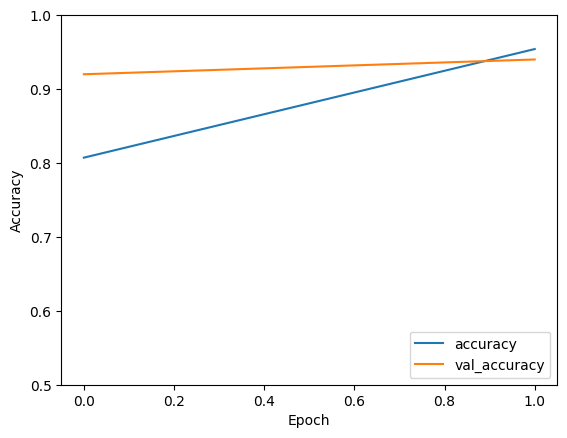

In [ ]:
!pip install ncps
from ncps.wirings import AutoNCP
from ncps.tf import LTC

ncp = LTC(AutoNCP(32, output_size=8), return_sequences=True)
# Model
def make_standard_ncp_classifier(n_outputs=1):
  model = models.Sequential()
  model.add(layers.Conv2D(1*n_filters, (3,3), activation='relu', input_shape=(64,64,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(2*n_filters, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(4*n_filters, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(6*n_filters, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  ncp,
  model.add(layers.Dense(n_outputs, activation=None))
  return model

ncp_model = make_standard_ncp_classifier()

ncp_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
ncp_model.summary()

print(images[:-50].shape)
print(labels[:-50].shape)

history = ncp_model.fit(images[:-50], labels[:-50], epochs=2,
                    validation_data=(images[-50:], labels[-50:]), batch_size=100)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images[-50:],  labels[-50:], verbose=2)

print(test_acc)

In [10]:
import tensorflow as tf
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(4),
        ]
    )
model.summary()
model2 = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(2,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 9220      
                                                                 
Total params: 28,036
Trainable params: 28,036
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)            